## Homework 10 Question 2
##### 2022-07-27

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.sparse import csr_matrix
from scipy.sparse import diags
from scipy import sparse as sp
import pickle
warnings.filterwarnings("ignore")

### Part A

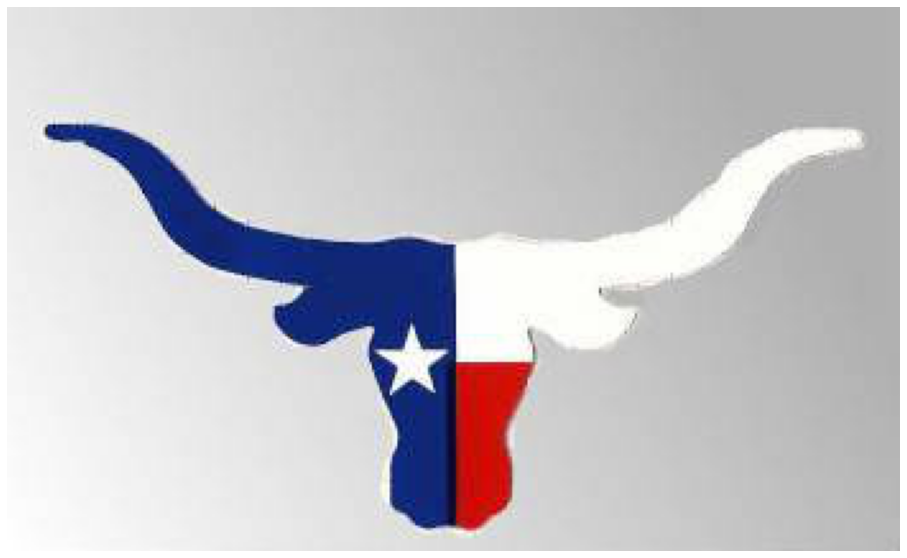

In [2]:
pkl_file = open('TexasLonghorn.pkl', 'rb')
img = pickle.load(pkl_file)
pkl_file.close()

# plot the image
_, ax = plt.subplots(figsize=(16, 10))
ax.imshow(img)
ax.axis('equal')
ax.axis('off')
plt.show()

The image displaed is the Texas state flag superimposed on a silhouette of the head of a longhorn bull.

### Part B

In [3]:
img.shape

(213, 350, 3)

The image is 213 pixels tall by 350 pixels wide with 3 color layers.

### Part C

In [6]:
I = img.shape[0]
J = img.shape[1]
numPixels = I * J

redPixelVals = img[:, :, 0].flatten()
greenPixelVals = img[:, :, 1].flatten()
bluePixelVals = img[:, :, 2].flatten()

neighborMat = csr_matrix((numPixels, numPixels))

adjToNeighbor = np.array([1, J - 1, J, J + 1, -1, -(J - 1), -J, -(J + 1)])
neighborGrid = np.array([x + adjToNeighbor for x in range(numPixels)])

rowNums = np.asarray(np.repeat(list(range(numPixels)), 8)).reshape([numPixels, 8])
neighborGrid[neighborGrid < 0] = rowNums[neighborGrid < 0]
neighborGrid[neighborGrid > numPixels-1] = rowNums[neighborGrid > numPixels-1]
neighborGrid[J * np.array(range(I)), 1] = J * np.array(range(I))
neighborGrid[J * np.array(range(I)), 4] = J * np.array(range(I))
neighborGrid[J * np.array(range(I)), 7] = J * np.array(range(I))
neighborGrid[J * np.array(range(1, I+1)) - 1, 5] = J * np.array(range(1, I+1)) - 1
neighborGrid[J * np.array(range(1, I+1)) - 1, 3] = J * np.array(range(1, I+1)) - 1
neighborGrid[J * np.array(range(1, I+1)) - 1, 0] = J * np.array(range(1, I+1)) - 1

neighborMat[np.repeat(list(range(numPixels)), 8), neighborGrid.flatten()] = 1
neighborMat[np.array(range(numPixels)), np.array(range(numPixels))] = 0

print(neighborMat[73850, :])

  (0, 73500)	1.0
  (0, 73501)	1.0
  (0, 73850)	0.0
  (0, 73851)	1.0
  (0, 74200)	1.0
  (0, 74201)	1.0


In [10]:
neighborGrid.shape

(74550, 8)

In [11]:
neighborMat.shape

(74550, 74550)

### Part D

In [ ]:
#Now lets find which spots we need to calculate things for the W matrix
ixW = sp.find(neighborMat == 1)

#Initialzie W matrix and set sigma parameter
s = 30
W = csr_matrix((numPixels,numPixels))

#Calculate the W Matrix
### INSERT YOUR CODE HERE ###



#Calculate the D Matrix
D = np.squeeze(np.asarray(np.sum(W,axis = 1)))       

#Check the values of the D matrix
D.min()
D.max()

#Report values of D matrix
### INSERT YOUR CODE HERE ###

### Part E

In [ ]:
#Create the L matrix and LSM matrix
### INSERT YOUR CODE HERE ###

#Part e answers
np.sum(Lrw != 0)
Lrw[55,62]
Lrw[34331,34332]
Lrw[74199,74548]

### Part F

In [ ]:
#Find the eigenvectors (and values) of the L matrix
K = 10
M = csr_matrix(diags(D))
Minv = csr_matrix(diags(1/D))
initVec = (D > 6)
#Other options for initVec that yield different results
# initVec = (redPixelVals > 100)/numPixels
# initVec = ((redPixelVals + bluePixelVals + greenPixelVals) > 550)/numPixels
initVec = initVec / sum(initVec)
lam, v = sp.linalg.eigs(Lrw,K,M = M,Minv = Minv,v0 = initVec)

#Pull out the top K vectors to use
Y = np.real(v[:,0:K])

#Normalize the rows of Y
Y = np.transpose(np.transpose(Y)/np.linalg.norm(Y,axis = 1))
Y = np.nan_to_num(Y)

#Perform K-Means on Y
kmeans = KMeans(init = 'k-means++',n_clusters = 5,n_init = 10,
                max_iter = 300,random_state=0)
kmeans.fit(Y)

#Create a plot
from matplotlib.colors import from_levels_and_colors
cmap , norm = from_levels_and_colors([-.5,0.5,1.5], ['white','black'])
clusterImg = ### INSERT YOUR CODE HERE ###
plt.imshow(clusterImg,cmap=cmap)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()